In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing BeautifulSoup library which is used to extract data from html files and 
urlopen is used to open the URLs

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

Extract the data from the given url and passed it to urlopen

In [3]:
url = "https://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

    By Performing above step we got the html page. 
    Now we will create BeautifulSoup Object from html

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

    Creating BeautifulSoup Object will allow us to interact with the tags 

In [5]:
print(soup.title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [6]:
"""text = soup.get_text()
print(soup.text)
"""

'text = soup.get_text()\nprint(soup.text)\n'

In [7]:
# Here the a tag used to get hyperlinks.But we can see that it contains additional attributes such as src, class etc.

soup.find_all('a')

[<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="#tabs-1" style="font-size: 18px">Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [8]:
# Now we will extract only hyperlinks i.e. href
all_links = soup.find_all('a')
for link in all_links:
    print(link.get("href"))

/results/2017GPTR
https://www.hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [9]:
# Here we extract the first 10 table rows
rows = soup.find_all('tr')
print(rows[:10])

[<tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>00:36:21</td>
<td>05:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>00:00:03</td>
<td>00:36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:36:42</td>
<td>05:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>00:00:03</td>
<td>00:36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:37:44</td>
<td>06:05</td>
<td

In [10]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


In [11]:
type(row_td)

bs4.element.ResultSet

    We need to convert above table to dataframe.
    Also we need to remove html tags.For that we can either use regular expressions or BeautifulSoup

In [12]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells,'lxml').get_text()
print(cleantext)
type(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [13]:
import re

In [14]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean,'',str_cells))
    list_rows.append(clean2)
print(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [15]:
list_rows.append(clean2)

In [16]:
type(list_rows)

list

In [17]:
df = pd.DataFrame(list_rows)

In [18]:
type(df)


pandas.core.frame.DataFrame

In [19]:
df.head(5)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."


In [20]:
df1 = df[0].str.split(',',expand = True)

In [21]:
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [22]:
df1[0] = df1[0].str.strip('[')

In [23]:
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [24]:
# Get taable headers
col_lables = soup.find_all('th')

In [25]:
type(col_lables)

bs4.element.ResultSet

In [26]:
header_name = []
col_str = str(col_lables)
cleantext2 = BeautifulSoup(col_str,'lxml').get_text()
header_name.append(cleantext2)

In [27]:
type(cleantext2)

str

In [28]:
df2 = pd.DataFrame(header_name)
df2.head(5)

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [29]:
df3 = df2[0].str.split(',', expand = True)
df3.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [30]:
#Concating two dataframes i.e df3 and df1
frames = [df3,df1]

df4 = pd.concat(frames)
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None


In [31]:
#Now we will assign first row as a table header
new_header = df4.iloc[0] #grab the first row for the header
df4 = df4[1:] #take the data less the header row
df4.columns = new_header

In [32]:
df4.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]


In [33]:
df4.shape

(597, 14)

In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 596
Data columns (total 14 columns):
[Place              597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          577 non-null object
 Gender Place       577 non-null object
 Age Group          577 non-null object
 Age Group Place    577 non-null object
 Time to Start      577 non-null object
 Gun Time           577 non-null object
 Team]              577 non-null object
dtypes: object(14)
memory usage: 70.0+ KB


In [35]:
#missing values in each column
df4.isnull().sum()

0
[Place               0
 Bib                 1
 Name                4
 Gender              4
 City                4
 State               4
 Chip Time           4
 Chip Pace          20
 Gender Place       20
 Age Group          20
 Age Group Place    20
 Time to Start      20
 Gun Time           20
 Team]              20
dtype: int64

In [36]:
df4 = df4.dropna(axis=0, how = 'any')

In [37]:
df4.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [38]:
df4.shape

(577, 14)

In [39]:
df4.rename(columns={'[Place': 'Place', ' Team]': 'Team'}, inplace=True)

In [40]:
df4.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [41]:
df4['Team'] = df4['Team'].str.strip(']')

In [42]:
df4.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [43]:
df4.to_csv('Runners_data.csv')

# Data Analysis and Visualization

In [46]:
# Average finish time for runners
#Coverting chip time to minutes
type(df4[' Chip Time'])
time_list = df4[' Chip Time'].tolist()

time_in_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_in_mins.append(math)


In [48]:
df4['Runners time'] = time_in_mins
df4.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runners time
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [49]:
df4.describe(include=[np.number])

,Runners time
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


        As we can see from above that the average time for all the runners was 60 mins
        While from 10k Runners, the faster runner's time was 36 mins
        and lowet runner's time was around 101 mins.

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

Text(0,0.5,'Chip Time')

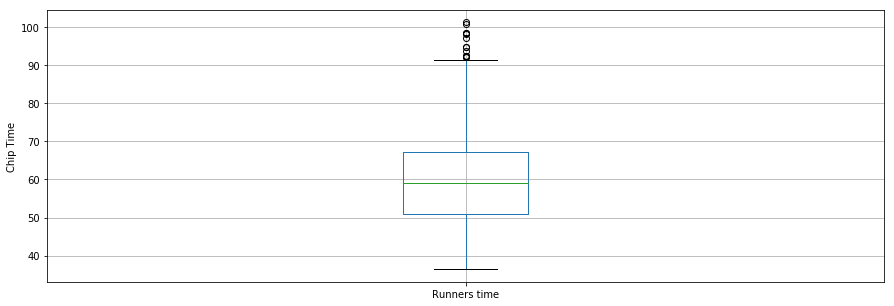

In [52]:
df4.boxplot(column = 'Runners time')
plt.ylabel('Chip Time')

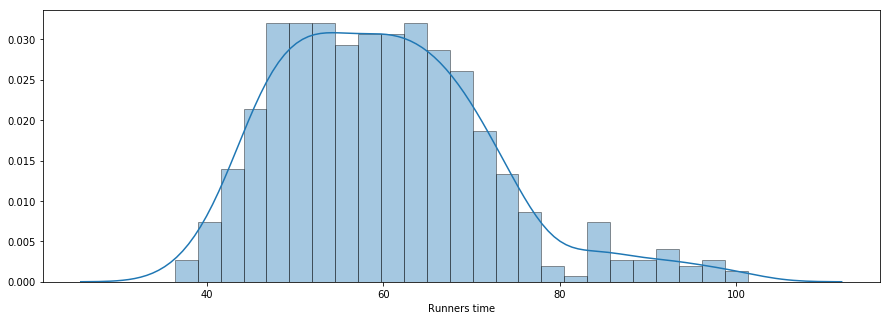

In [60]:
#Did Runner's finish time follows normal distribution 
import warnings
warnings.filterwarnings('ignore')
x = df4['Runners time']
ax = sns.distplot(x, hist=True, rug=False,kde=True,bins=25,hist_kws={'edgecolor':'black'})
plt.show()

In [62]:
#Distribution plot seperate for males and females
Male_Time = df4.loc[df4[' Gender']== ' M']['Runners time']

In [63]:
Female_Time = df4.loc[df4[' Gender']== ' F']['Runners time']

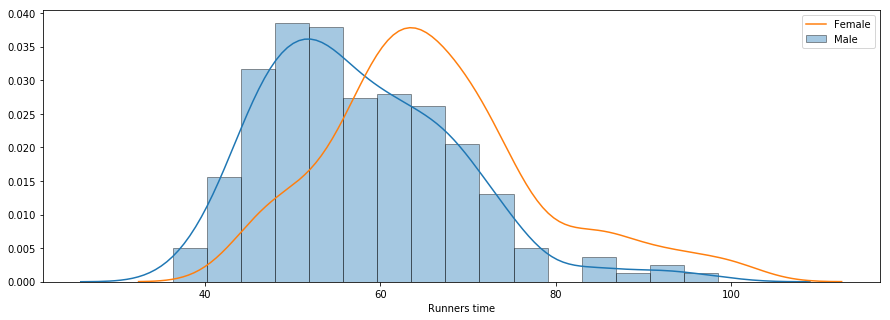

In [64]:
sns.distplot(Male_Time, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
sns.distplot(Female_Time, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
plt.legend()

        As we can see from the above figure that average time to finish for female is higher than male 
        which states that females were slower as compared to male

Text(0.5,0.98,'')

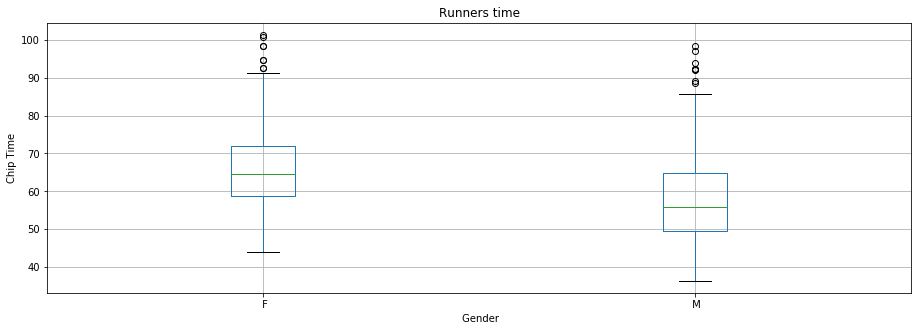

In [66]:
df4.boxplot(column='Runners time', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")